## LSTM Time Series 
- example with Sine wave 

In [36]:
import numpy as np
from scipy.optimize import leastsq
import pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

## Create noisy sine wave data time series
N = 10000 # number of data points
t = np.linspace(0, 50*np.pi, N)
data = 4.0*np.sin(t+0.001) + np.random.randn(N) # create artificial data with noise

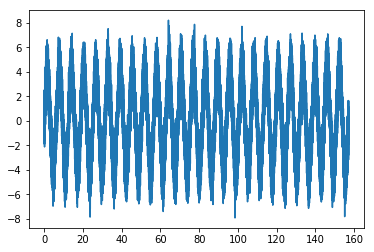

In [17]:
new_data = pd.DataFrame(zip(t, data)).values
plt.plot(t, new_data[:,1])

In [18]:
# import keras stuff....
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

In [24]:
# we have shifts and a window. We want to take the time series and add window columns that are ofset by shift amount. 
# So for example, we can shift by 1 second over a window of 30 seconds. This means we create a data set containing
# 30 columns. 
def timeseries_to_lstm(timeseries_data, shift=1, window=5):
    window_number_of_shifts = []
    for i in range(window):
        window_number_of_shifts.append(timeseries_data.shift(i))

    d = pd.concat(window_number_of_shifts, 1)
    d.columns = range(d.shape[1])
    print d.head(10)
    d = d.values[chunk:,:]
    return d

In [25]:
# The time series contains NaNs where the shift occurred so these must be removed. 
timeseries_data = pd.DataFrame(data)
timeseries_data.head()
d = timeseries_to_lstm(timeseries_data, shift=1, chunk=5)

          0         1         2         3         4
0 -0.578084       NaN       NaN       NaN       NaN
1  0.548365 -0.578084       NaN       NaN       NaN
2 -1.378333  0.548365 -0.578084       NaN       NaN
3 -1.414162 -1.378333  0.548365 -0.578084       NaN
4 -0.004738 -1.414162 -1.378333  0.548365 -0.578084
5 -1.200145 -0.004738 -1.414162 -1.378333  0.548365
6 -0.427708 -1.200145 -0.004738 -1.414162 -1.378333
7 -1.398298 -0.427708 -1.200145 -0.004738 -1.414162
8 -0.653663 -1.398298 -0.427708 -1.200145 -0.004738
9  0.271200 -0.653663 -1.398298 -0.427708 -1.200145


In [28]:
lstm_data = d
print lstm_data
lstm_data.shape

[[-1.20014512 -0.00473802 -1.41416245 -1.37833318  0.54836513]
 [-0.42770811 -1.20014512 -0.00473802 -1.41416245 -1.37833318]
 [-1.39829768 -0.42770811 -1.20014512 -0.00473802 -1.41416245]
 ..., 
 [-3.18624517 -0.29722325  0.44882346 -0.54064913 -0.77066185]
 [ 1.11681016 -3.18624517 -0.29722325  0.44882346 -0.54064913]
 [ 0.93109886  1.11681016 -3.18624517 -0.29722325  0.44882346]]


(99995, 5)

In [ ]:
percentage = .3
limit = int(lstm_data.shape[0]*percentage)
# Test comes after the training data 
# (with a time series... this is how test train works)
train = lstm_data[:limit, :]
test = lstm_data[limit:, :]

In [51]:
# train and test_y are the last column of the dataset (the 30th column)
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

((29998, 1, 4), (29998,), (69997, 1, 4), (69997,))


Train on 29998 samples, validate on 69997 samples
Epoch 1/50
6s - loss: 1.2122 - val_loss: 0.8915
Epoch 2/50
6s - loss: 0.8954 - val_loss: 0.8828
Epoch 3/50
6s - loss: 0.8905 - val_loss: 0.8826
Epoch 4/50
5s - loss: 0.8895 - val_loss: 0.8823
Epoch 5/50
5s - loss: 0.8891 - val_loss: 0.8819
Epoch 6/50
5s - loss: 0.8887 - val_loss: 0.8818
Epoch 7/50
5s - loss: 0.8884 - val_loss: 0.8820
Epoch 8/50
5s - loss: 0.8881 - val_loss: 0.8819
Epoch 9/50
5s - loss: 0.8879 - val_loss: 0.8818
Epoch 10/50
5s - loss: 0.8874 - val_loss: 0.8817
Epoch 11/50
5s - loss: 0.8871 - val_loss: 0.8819
Epoch 12/50
5s - loss: 0.8869 - val_loss: 0.8815
Epoch 13/50
5s - loss: 0.8868 - val_loss: 0.8813
Epoch 14/50
5s - loss: 0.8865 - val_loss: 0.8816
Epoch 15/50
5s - loss: 0.8864 - val_loss: 0.8814
Epoch 16/50
5s - loss: 0.8862 - val_loss: 0.8810
Epoch 17/50
5s - loss: 0.8860 - val_loss: 0.8804
Epoch 18/50
5s - loss: 0.8858 - val_loss: 0.8808
Epoch 19/50
5s - loss: 0.8858 - val_loss: 0.8807
Epoch 20/50
5s - loss: 0.885

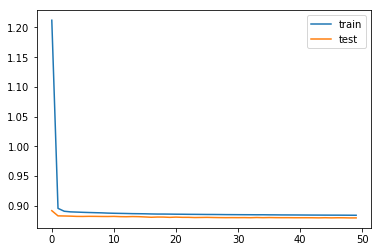

In [52]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))

model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(
    train_X, 
    train_y, 
    epochs=50, 
    batch_size=72, 
    validation_data=(test_X, test_y), 
    verbose=2, 
    shuffle=False
)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

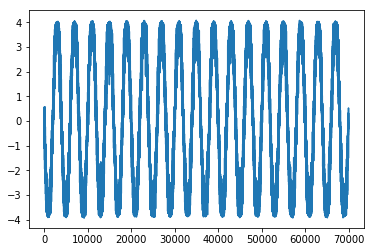

In [53]:
## plot the test output 
plt.plot(model.predict(test_X))

In [54]:
from numpy import concatenate
yhat = model.predict(test_X)
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1.103
